In [1]:
# To ignore warnings
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline

In [2]:
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")


In [3]:
df_train.shape , df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
df_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
df_train.duplicated().sum()

0

In [7]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

drop coulmn with more half of the vlues missing

In [9]:
df_train.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [10]:
df_train.drop(columns=['LotFrontage'], inplace=True)

correlartion with basment features is low so we can drop them 

In [11]:
df_train.drop(columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], inplace=True)

In [12]:
df_train.dropna(subset=['GarageType'], inplace=True)

In [13]:
df_train.dropna(subset=['MasVnrArea'], inplace=True)

In [14]:
df_train.dropna(subset=['Electrical'], inplace=True)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1370 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1370 non-null   int64  
 1   MSSubClass     1370 non-null   int64  
 2   MSZoning       1370 non-null   object 
 3   LotArea        1370 non-null   int64  
 4   Street         1370 non-null   object 
 5   LotShape       1370 non-null   object 
 6   LandContour    1370 non-null   object 
 7   Utilities      1370 non-null   object 
 8   LotConfig      1370 non-null   object 
 9   LandSlope      1370 non-null   object 
 10  Neighborhood   1370 non-null   object 
 11  Condition1     1370 non-null   object 
 12  Condition2     1370 non-null   object 
 13  BldgType       1370 non-null   object 
 14  HouseStyle     1370 non-null   object 
 15  OverallQual    1370 non-null   int64  
 16  OverallCond    1370 non-null   int64  
 17  YearBuilt      1370 non-null   int64  
 18  YearRemodAdd 

In [16]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


#### outliers

In [17]:
df_train.shape

(1370, 69)

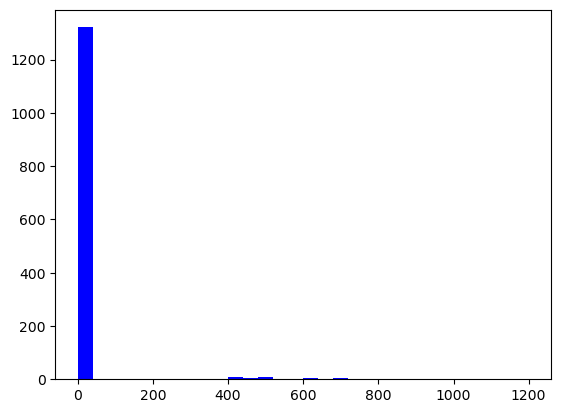

In [18]:
df_train=df_train[df_train['MiscVal']<1300]

plt.hist(df_train['MiscVal'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [19]:
df_train.shape

(1361, 69)

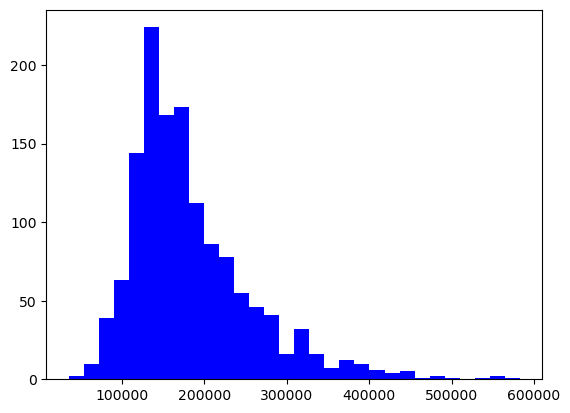

In [20]:
df_train=df_train[df_train['SalePrice']<600000]

plt.hist(df_train['SalePrice'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [21]:
df_train.shape

(1357, 69)

In [22]:
df_train.shape

(1357, 69)

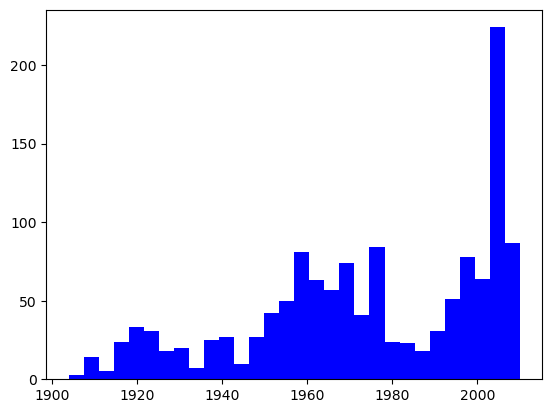

In [23]:
df_train=df_train[df_train['YearBuilt']>1900]

plt.hist(df_train['YearBuilt'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [24]:
df_train.shape

(1336, 69)

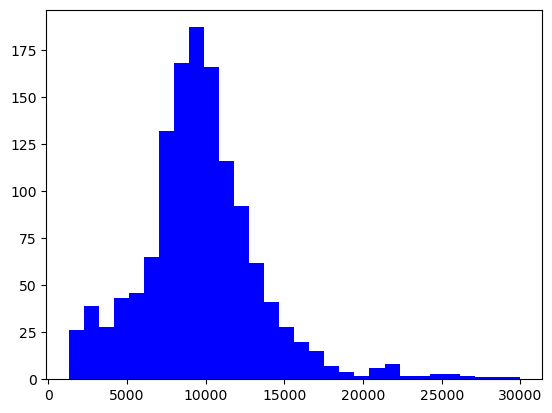

In [25]:
df_train=df_train[df_train['LotArea']<30000]

plt.hist(df_train['LotArea'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()

In [26]:
df_train.shape

(1316, 69)

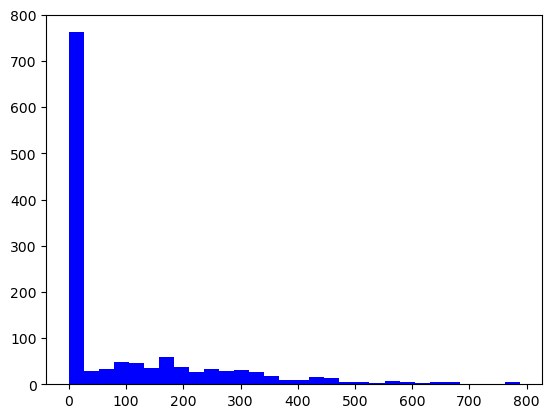

In [27]:

df_train=df_train[df_train['MasVnrArea']<800]

plt.hist(df_train['MasVnrArea'],
         bins=30,            
         facecolor='blue',  
        )
plt.show()


In [28]:
df_train.shape

(1304, 69)

#### 2. Feature engineering

In [29]:
df_train.shape

(1304, 69)

In [30]:
df_train = pd.get_dummies(df_train, columns=df_train.select_dtypes(include=['object']).columns)

In [31]:
df_train.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False


In [32]:
df_train.shape

(1304, 236)

#### 3. Feature selection

In [33]:
correlation_data = df_train.drop(['Id'], axis=1).corr()
print(correlation_data['SalePrice'].sort_values(ascending=False))

SalePrice            1.000000
OverallQual          0.800145
GrLivArea            0.724825
GarageCars           0.650345
GarageArea           0.629800
                       ...   
Foundation_CBlock   -0.382302
GarageType_Detchd   -0.437450
GarageFinish_Unf    -0.516900
KitchenQual_TA      -0.548317
ExterQual_TA        -0.616154
Name: SalePrice, Length: 235, dtype: float64


In [34]:
threshold = 0.296

selected_features = correlation_data[abs(correlation_data['SalePrice']) > threshold]['SalePrice'].index
selected_features

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'SalePrice', 'MSZoning_RM', 'Neighborhood_NridgHt',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [35]:
selected_features=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'SalePrice', 'MSZoning_RM', 'Neighborhood_NridgHt',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial']

In [36]:
df_train=df_train[selected_features]
df_train

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,8450,7,2003,2003,196.0,706,856,856,1710,2,...,False,False,True,False,True,False,False,False,False,False
1,9600,6,1976,1976,0.0,978,1262,1262,1262,2,...,False,False,False,True,True,False,False,False,False,False
2,11250,7,2001,2002,162.0,486,920,920,1786,2,...,False,False,True,False,True,False,False,False,False,False
3,9550,7,1915,1970,0.0,216,756,961,1717,1,...,False,False,True,False,False,True,False,True,False,False
4,14260,8,2000,2000,350.0,655,1145,1145,2198,2,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,7500,7,2004,2005,0.0,410,1221,1221,1221,2,...,False,False,True,False,True,False,False,False,False,False
1455,7917,6,1999,2000,0.0,0,953,953,1647,2,...,False,False,False,True,True,False,False,False,False,False
1456,13175,6,1978,1988,119.0,790,1542,2073,2073,2,...,True,False,False,True,True,False,False,True,False,False
1458,9717,5,1950,1996,0.0,49,1078,1078,1078,1,...,False,False,True,False,True,False,False,True,False,False


In [37]:
df_train.columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'SalePrice', 'MSZoning_RM', 'Neighborhood_NridgHt',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

####  Prepare train and test data

In [38]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X.shape

(1304, 36)

## Buliding the Model

In [40]:
model = LinearRegression()

### Train the model

In [41]:
model.fit(X_train_scaled, y_train)

LinearRegression()

### test the model

In [42]:
y_pred = model.predict(X_test_scaled)


In [43]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
LotArea,6489.823910
OverallQual,15960.148624
YearBuilt,2724.865618
YearRemodAdd,3570.221067
MasVnrArea,2408.105667
BsmtFinSF1,10090.494053
TotalBsmtSF,7331.664545
1stFlrSF,376.983310
GrLivArea,24102.573744
FullBath,-1856.661965


### evaluate the model

In [44]:
y_base = [y_train.mean()] * len(y_test)

In [45]:
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base: ,}')

Mean Squared Error of base model:  4,156,782,321.4549527


In [46]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train: ,}')
print(f'Mean Squared Error for testing: {mse_test: ,}')

Mean Squared Error for training:  635,447,298.6700193
Mean Squared Error for testing:  447,040,590.5534947


root mean square error

In [47]:
print(f'Root Mean Squared Error of base model: {np.sqrt(mse_base): ,}')

Root Mean Squared Error of base model:  64,473.11316707882


In [48]:
# RMSE for Linear model
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train):,}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test):,}')



Root Mean Squared Error for training: 25,208.080027443964
Root Mean Squared Error for testing: 21,143.334423725475


In [49]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')


R Square for training: 0.8803904078940893
R Square for testing: 0.8918184580593584


In [50]:
prediction = model.predict(X_test_scaled)

In [51]:
Real_Values = np.array(y_test)


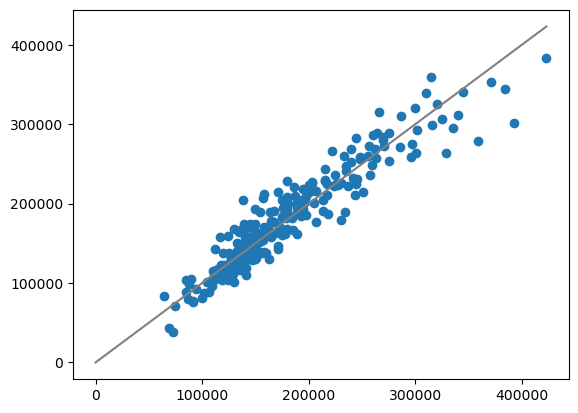

In [52]:
plt.scatter(Real_Values,prediction); 
max_value = max(max(Real_Values), max(prediction))
plt.plot([0, max_value], [0, max_value], color='grey', linestyle='-', label='Perfect Prediction')

####  TEST DATA

In [53]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [55]:
ids= df_test['Id']

In [56]:
df_test.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [57]:
df_test.drop(columns=['LotFrontage'], inplace=True)

In [58]:
df_test.drop(columns=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], inplace=True)

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [60]:
df_test['Utilities'].fillna(df_test['Utilities'].mode()[0], inplace=True)
df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0], inplace=True)
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0], inplace=True)
df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0], inplace=True)
df_test['Functional'].fillna(df_test['Functional'].mode()[0], inplace=True)
df_test['GarageType'].fillna(df_test['GarageType'].mode()[0], inplace=True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0], inplace=True)
df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0], inplace=True)
df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0], inplace=True)
df_test['SaleType'].fillna(df_test['SaleType'].mode()[0], inplace=True)
df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0], inplace=True)


In [61]:
df_test.fillna(df_test.select_dtypes(include='float').median(), inplace=True)

In [62]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [63]:
df_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include=['object']).columns)

In [64]:
selected_features=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF',  'MSZoning_RM', 'Neighborhood_NridgHt',
       'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'ExterQual_Ex',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Ex', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial']

In [65]:
df_test= df_test[selected_features]
df_test

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_New,SaleCondition_Partial
0,11622,5,1961,1961,0.0,468.0,882.0,896,896,1,...,True,False,False,True,True,False,False,True,False,False
1,14267,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,...,True,False,True,False,True,False,False,True,False,False
2,13830,5,1997,1998,0.0,791.0,928.0,928,1629,2,...,False,False,False,True,True,False,True,False,False,False
3,9978,6,1998,1998,20.0,602.0,926.0,926,1604,2,...,False,False,True,False,True,False,True,False,False,False
4,5005,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,0.0,0.0,546.0,546,1092,1,...,False,False,False,True,True,False,False,True,False,False
1455,1894,4,1970,1970,0.0,252.0,546.0,546,1092,1,...,True,False,False,True,False,False,False,True,False,False
1456,20000,5,1960,1996,0.0,1224.0,1224.0,1224,1224,1,...,False,False,False,True,False,True,False,True,False,False
1457,10441,5,1992,1992,0.0,337.0,912.0,970,970,1,...,True,False,False,True,True,False,False,True,False,False


In [66]:
predictions = model.predict(df_test)

In [67]:
sample_submission = pd.DataFrame({
    'Id': ids,
    'SalePrice': predictions
})

sample_submission

,Id,SalePrice
0,1461,1.236148e+08
1,1462,1.582244e+08
2,1463,1.587197e+08
3,1464,1.312313e+08
4,1465,9.060372e+07
...,...,...
1454,2915,5.584480e+07
1455,2916,5.908239e+07
1456,2917,1.957839e+08
1457,2918,1.145587e+08


In [68]:
sample_submission.shape

(1459, 2)

In [69]:
# Save the predictions to a new CSV file
sample_submission.to_csv("Mysample_submission.csv",index=False)